In [13]:
%matplotlib inline

In [23]:
ad_genes = "APP,HFE,MPO,NOS3,PLAU,ABCA7,PSEN2,PSEN1,APOE"
schizo_genes = "APOL2,APOL4,CHI3L1,COMT,DAOA,DISC2,DRD3,HTR2A,MTHFR,RTN4R,SYN2,SHANK3,DISC1,RBM12,NRXN1,SLC1A1,PRODH,NRG1"

ad_dict = {
    # Alzheimer Disease
    "APP": "9606.ENSP00000284981",
    "HFE": "9606.ENSP00000417404",
    "MPO": "9606.ENSP00000225275",
    "NOS3": "9606.ENSP00000297494",
    "PLAU": "9606.ENSP00000361850",
}

ad_related_dict = {
    # AD Related
    "ABCA7": "9606.ENSP00000263094",
    "PSEN1": "9606.ENSP00000326366",
    "PSEN2": "9606.ENSP00000355747",
    "APOE": "9606.ENSP00000252486",
}

ad_full = ad_dict | ad_related_dict

schiz_dict = {
    # Schizophrenia
    "APOL2": "9606.ENSP00000249066",
    "APOL4": "9606.ENSP00000338260",
    "CHI3L1": "9606.ENSP00000255409",
    "COMT": "9606.ENSP00000354511",
    "DAOA": "9606.ENSP00000483757",
    "DISC1": "9606.ENSP00000355593",
    "DRD3": "9606.ENSP00000373169",
    "HTR2A": "9606.ENSP00000437737",
    "MTHFR": "9606.ENSP00000365777",
    "RTN4R": "9606.ENSP00000043402",
    "SYN2": "9606.ENSP00000480050",
}

schiz_related_dict = {
    # Schizophrenia Related
    "RBM12": "9606.ENSP00000363228",
    "NRXN1": "9606.ENSP00000385142",
    "SLC1A1": "9606.ENSP00000262352",
    "PRODH": "9606.ENSP00000481127",
    "NRG1": "9606.ENSP00000384620",
}

schiz_full = schiz_dict | schiz_related_dict

In [2]:
from graph_tool.all import *

g = load_graph("/data.graphml")

print(g)

<Graph object, undirected, with 19382 vertices and 5968680 edges, 1 internal vertex property, 4 internal edge properties, at 0x7f354cb93310>


In [ ]:
print(g.vertex_index)
for v in g.vertices():
    print(v)

In [10]:
# Centrality
vp_betweenness, ep_betweenness = graph_tool.centrality.betweenness(g)
print(f"vertex p betweenness = {vp_betweenness}")
print(f"edge p betweenness = {ep_betweenness}")

vp_closness = graph_tool.centrality.closeness(g)
print(f"vertex p closeness = {vp_closness}")

vertex p betweenness = <VertexPropertyMap object with value type 'double', for Graph 0x7f354cb93310, at 0x7f351807d4f0>
edge p betweenness = <EdgePropertyMap object with value type 'double', for Graph 0x7f354cb93310, at 0x7f351807d460>
vertex p closeness = <VertexPropertyMap object with value type 'double', for Graph 0x7f354cb93310, at 0x7f3519384880>


In [11]:
# Clustering

local_clustering = graph_tool.clustering.local_clustering(g)

print(graph_tool.stats.vertex_average(g, local_clustering))

global_clustering = graph_tool.clustering.global_clustering(g)

print(global_clustering)

(0.1952338728921458, 0.0006214113968411895)
(0.19299713533367516, 0.0010956810919999342)


In [8]:
# Correlations
assort = graph_tool.correlations.assortativity(g, "total")
print(assort)

(3.561537713627508e-05, 1.0387960155481485e-05)


In [25]:
schiz_res = {}
ad_res = {}

# print(g.list_properties())
prop = g.vertex_properties["_graphml_vertex_id"]

for key, value in schiz_dict.items():
    schiz_vertex = graph_tool.util.find_vertex(g, prop, key)[0]
    print(f"Schiz: found vertex for {key} - {schiz_vertex}")
    schiz_res[key] = schiz_vertex


for key, value in ad_dict.items():
    ad_vertex = graph_tool.util.find_vertex(g, prop, key)[0]
    print(f"AD: found vertex for {key} - {ad_vertex}")
    ad_res[key] = ad_vertex


Schiz: found vertex for APOL2 - 13385
Schiz: found vertex for APOL4 - 18099
Schiz: found vertex for CHI3L1 - 3394
Schiz: found vertex for COMT - 1486
Schiz: found vertex for DAOA - 15629
Schiz: found vertex for DISC1 - 12924
Schiz: found vertex for DRD3 - 6981
Schiz: found vertex for HTR2A - 8935
Schiz: found vertex for MTHFR - 5774
Schiz: found vertex for RTN4R - 4843
Schiz: found vertex for SYN2 - 8892
AD: found vertex for APP - 1501
AD: found vertex for HFE - 1856
AD: found vertex for MPO - 5548
AD: found vertex for NOS3 - 5768
AD: found vertex for PLAU - 10331


In [26]:
# Print Stats from our Vertices
import numpy as np

schiz_betweenness = {}
ad_betweenness = {}
schiz_closeness = {}
ad_closeness = {}
schiz_local_cluster = {}
ad_local_cluster = {}
schiz_degree = {}
ad_degree = {}

for key, value in schiz_res.items():
    schiz_betweenness[key] = vp_betweenness[value]
    schiz_closeness[key] = vp_closness[value]
    schiz_degree[key] = g.get_total_degrees([value])
    schiz_local_cluster[key] = local_clustering[value]
    

for key, value in ad_res.items():
    ad_betweenness[key] = vp_betweenness[value]
    ad_closeness[key] = vp_closness[value]
    ad_degree[key] = g.get_total_degrees([value])
    ad_local_cluster[key] = local_clustering[value]
    
    
print(f"betweenness whole graph: {np.average(vp_betweenness.a)}")
print(f"closeness whole graph: {np.average(vp_closness.a)}")
print(f"node degree average whole graph: {graph_tool.stats.vertex_average(g, 'total')}")

betweenness whole graph: 5.369104564006777e-05
closeness whole graph: 0.49165797352336726
node degree average whole graph: (615.8992879991745, 3.6760079012729885)


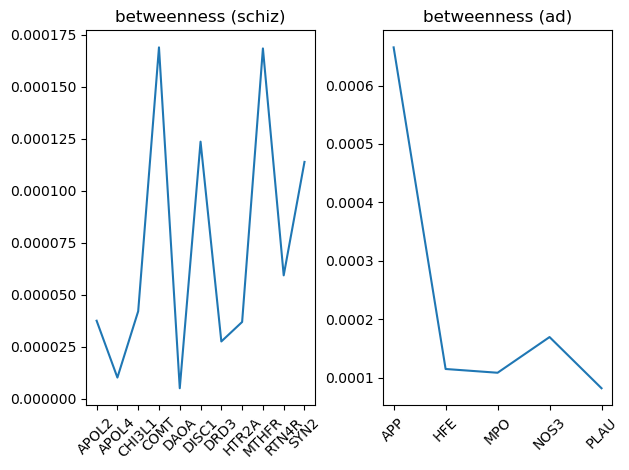

In [52]:
import matplotlib.pyplot as plt
lists = schiz_betweenness.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("betweenness (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_betweenness.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("betweenness (ad)")
plt.tight_layout()
plt.plot(x,y)

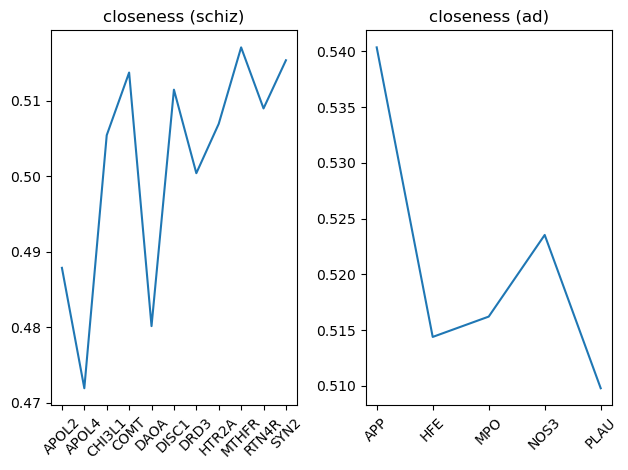

In [53]:
lists = schiz_closeness.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("closeness (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_closeness.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("closeness (ad)")
plt.tight_layout()
plt.plot(x,y)

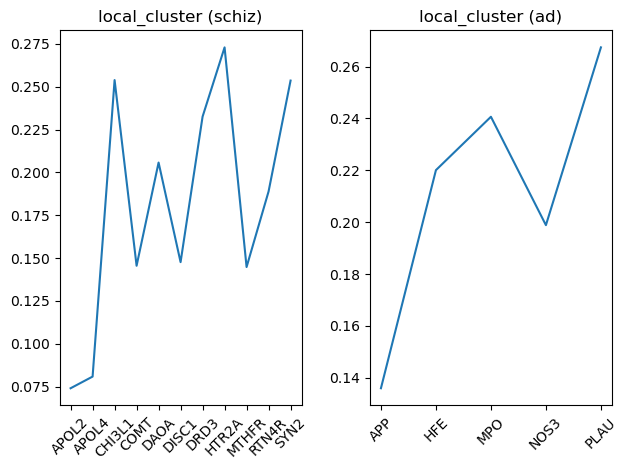

In [54]:
lists = schiz_local_cluster.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("local_cluster (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_local_cluster.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("local_cluster (ad)")
plt.tight_layout()
plt.plot(x,y)

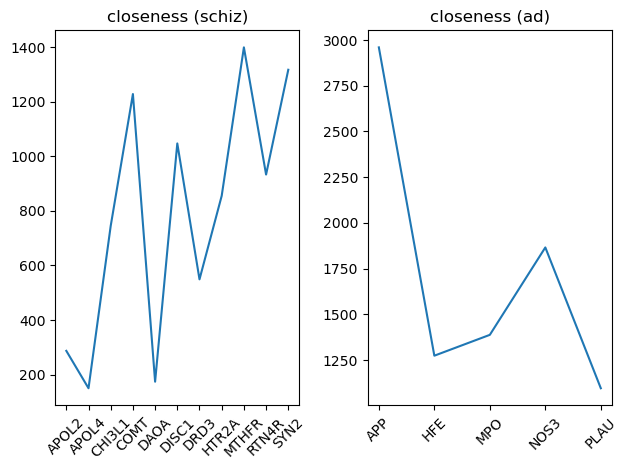

In [55]:
lists = schiz_degree.items()
x, y = zip(*lists)
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.title("degree (schiz)")
plt.plot(x,y)
plt.subplots_adjust(left=.89)
plt.subplot(1, 2, 2)
lists = ad_degree.items()
x, y = zip(*lists)
plt.xticks(rotation = 45)
plt.title("degree (ad)")
plt.tight_layout()
plt.plot(x,y)

In [ ]:
# Draw with Modularity
state = graph_tool.inference.minimize.minimize_blockmodel_dl(g)
print(state)
state.draw(pos=g.vp.pos, output="blockmodel.svg")

In [ ]:
# Draw Random
pos = graph_tool.draw.random_layout(g, dim=2)
graph_tool.draw.graph_draw(g, pos=pos, output="graph-draw-random.pdf")

# OR
# graph_tool.draw.graph_draw(g, vertex_text=g.vertex_index, output="test.pdf")

In [ ]:
# Draw with Fruchterman Reingold Layout
pos = graph_tool.draw.fruchterman_reingold_layout(g, n_iter=1000)
graph_tool.draw.graph_draw(g, pos=pos, output="graph-draw-fr.pdf")

In [ ]:
# Minimal Spanning Treen
from numpy.random import random

tree = graph_tool.topology.min_spanning_tree(g)
u = gt.GraphView(g, efilt=tree)
gt.graph_draw(u, pos=pos, output="triang_min_span_tree.pdf")